# Método de Euler para solução de EDOs

O método de Euler é uma forma de resolver numericamente uma equação diferencial ordinária. Assumem-se conhecidas a derivada de uma função que se quer encontrar ("resolver") e um valor inicial da equação a ser integrada. Por exemplo, no caso do movimento uniformemente acelerado:$$a=\mbox{constante}, b=\mbox{constante}$$

$$v(t) = x'(t) = dx(t)/dt = 2*a*t + b$$, $$x(0)=0$$

A ideia do método de Euler é substituir a derivada por uma aproximação de Taylor, desprezando-se os termos maiores que segunda ordem. Isto é:

$$x'(t)\sim \frac{x(t+\Delta t)-x(t)}{\Delta t}$$

Se denotarmos os valores de $x(t)$ por $x_t$, isto é, ao invés da notação de função, usarmos a notação com índices, e assumirmos que os valores de $t$ só podem ser números inteiros (portanto $\Delta t$ é no mínimo 1, o valor $x(t+\Delta t)$ pode ser escrito como $x_1$, para $t=0$; $x_2$, para $t=1$ e assim por diante. 

Desta maneira, o exemplo poderia ser escrito assim (note que já estamos assumindo $\Delta t = 1$:

$$v(t) = x'(t) = 2*a*t + b \sim x_t - x_{t-1},$$

isto é,

$$ x_t = x_{t-1} + 2*a*t + b $$

Como sabemos o valor inicial em $t=0$, podemos calcular $x_t$ para todo $t>0$:

$$ x_1 = x_{0} + 2*a*1 + b $$

$$ x_2 = x_{1} + 2*a*2 + b = 6*a + 2*b$$

$$ x_3 = x_{2} + 2*a*3 + b = 6*a + 2*b + 6*a + b = 12*a + 3*b$$

e assim por diante.

Em verdade, $\Delta t$ não precisa ser um número inteiro e em geral, não é. Porém, no caso de não ser um número inteiro, desacoplamos os índices do incremento pois os índices são inteiros. Isto é:

$$x'(t)\sim \frac{x(t+\Delta t)-x(t)}{\Delta t}$$

$$x(t+\Delta t) \sim x(t) + x'(t)*\Delta t$$

Aplicando para a equação do exemplo, temos:

$$ x_t = x_{t-1} + (2*a*t + b)*\Delta t $$




# Implementanto o método de Euler

Da forma que a equação foi construída, isto é, $ x_t = x_{t-1} + (2*a*t + b)*\Delta t $, é trivial implementá-la. basta que estabeleçamos os valores de $a$, $b$ e $x_0$.

No entanto, para a implementação ficar organizada, crie duas funções: 
- nextXeuler(x,t,params,dt): que recebe um vetor de parâmetros iniciais, params, o tempo e a posição atual, t e x, respectivamente, e o delta de tempo, dt (note que com isso desacoplamos os índices do incremento). A função retorna a nova posição $x_t$ de acordo com o método de Euler: $ x_t = x_{t-1} + (2*a*t + b)*\Delta t $.
- nextXana(t,params): que recebe um vetor de parâmetros iniciais, params, e o tempo atual. A função retorna a nova posição $x_t$ de acordo com a equação integrada analiticamente: $ x_t = a*t^2 + b*t + x_0 $.

Crie uma função main que itera essas duas funções entre os tempos 0s e 2s (com um dt de 0.1s) calcula e imprime a diferença entre elas (erro) e as grafique.


0
0.040000000000000036
0.08000000000000007
0.11999999999999922
0.16000000000000014
0.20000000000000018
0.2400000000000002
0.28000000000000114
0.3199999999999985
0.3600000000000012
0.3999999999999986
0.4399999999999977
0.47999999999999865
0.5199999999999996
0.5600000000000023
0.6000000000000014
0.639999999999997
0.6799999999999962
0.7199999999999989
0.7599999999999945


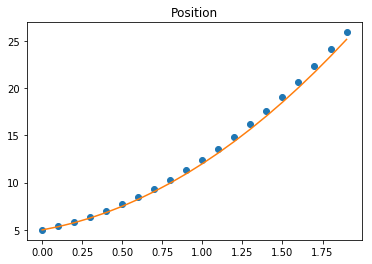

In [17]:
# Implementa o exercício da integração de Euler de dx(t)/dt = 2at + b
import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,t,params,dt):
    """ nextXeuler implementa o método de Euler.      
    Parâmetros:
    -----------
    x: float - Posição atual
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    dt: float - passo de tempo
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    a = params[0]
    b = params[1]
    x0 = params[2]
    
    x = x + (2*a*t + b) * dt
    return x
    ### END SOLUTION

def nextXana(t,params):
    """ nextXana implementa o método analítico. 

    Parâmetros:
    -----------
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    
    Returns:
    --------
    x: float : posição atualizada
    
    """

    ### BEGIN SOLUTION
    a = params[0]
    b = params[1]
    x0 = params[2]
    
    x = x0 + b*t + a*t**2
    return x
    ### END SOLUTION

def main():
    # tempo inicial
    t=0
    # tempo final
    tf=2
    # passo de tempo
    dt=0.1
    # posição inicial
    x=5
    # vetor de parâmetros inicial. Três posições com as constantes a, b e a posição inicial
    # Mude a vontade
    params = [4,3,x]
    # vetor para guardar os tempos do movimento
    vt=[t]
    # Forma de criar um vetor vazio em Python
    # vetor para guardar as posições da partícula segundo a forma analítica 
    vxa=[]
    # vetor para guardar as posições da partícula segundo Euler    
    vxe=[]

    ### BEGIN SOLUTION
    while (t<tf):
        vxa.append(nextXana(t,params))
        vxe.append(x)
        print(x - nextXana(t,params)) #erro
        t += dt
        vt.append(t)
        x = nextXeuler(x,t,params,dt)
    ### END SOLUTION

    # Se você implementou tudo certinho, use os comandos abaixo para graficar os resultados.
    pyplot.figure(0)
    pyplot.plot(vt[0:-1],vxe,label='Euler',linestyle='',marker='o') 
    pyplot.plot(vt[0:-1],vxa,label='Analytical')
    pyplot.title('Position')
    pyplot.show(block=False)

main() 

Repita o exercício acima para graficar com os incrementos. Isto é, para cada ponto, cria uma barra que indica o quanto foi o incremento usado. Use poucos pontos para ver o resultado.

0 0
1.0 0.25
2.5 0.5
4.5 0.75


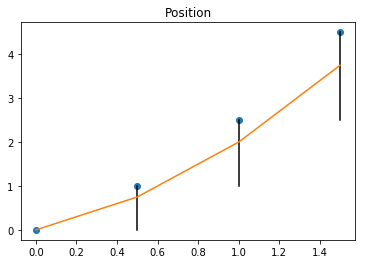

In [66]:
# Implementa o exercício da integração de Euler de dx(t)/dt = 2at + b

import numpy as np
import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,t,params,dt):
    """ nextXeuler implementa o método de Euler. 
        
    Parâmetros:
    -----------
    x: float - Posição atual
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    dt: float - passo de tempo
    
    Returns:
    --------
    x: float : posição atualizada
    
    """
    ### BEGIN SOLUTION
    a = params[0]
    b = params[1]
    x0 = params[2]
    
    x = x + (2*a*t + b) * dt
    return x
    ### END SOLUTION

def nextXana(t,params):
    """ nextXana implementa o método analítico. 

    Parâmetros:
    -----------
    t: float - Tempo atual
    params: float - vetor de três posições com as constantes a, b e a posição inicial
    
    Returns:
    --------
    x: float : posição atualizada
    
    """

    ### BEGIN SOLUTION
    a = params[0]
    b = params[1]
    x0 = params[2]
    
    x = x0 + b*t + a*t**2
    return x
    ### END SOLUTION

def main():
    # tempo inicial
    t= 
    # tempo final
    tf=
    # passo de tempo
    dt=
    # posição inicial
    x= 
    # vetor de parâmetros inicial. Três posições com as constantes a, b e a posição inicial
    # Mude a vontade
    params = [1,1,x]
    # vetor para guardar os tempos do movimento
    vt=[t]
    # Forma de criar um vetor vazio em Python
    # vetor para guardar as posições da partícula segundo a forma analítica 
    vxa=[]
    # vetor para guardar as posições da partícula segundo Euler    
    vxe=[]

    ### BEGIN SOLUTION
    ### END SOLUTION

    # Se você implementou tudo certinho, use os comandos abaixo para graficar os resultados.
    
    bvx = np.array(vt[1:-1])   
    bvy = np.array(vxe[0:-1]) 
    pvx = np.array(vt[1:-1])
    pvy = np.array(vxe[1:]) 

    pyplot.figure(0)
    pyplot.plot(np.array(vt[0:-1]),np.array(vxe),label='Euler',linestyle='',marker='o') 

    for i in range(len(vt)-2):
        pyplot.plot([bvx[i],pvx[i]],[bvy[i],pvy[i]], 'k-')
   
    pyplot.plot(np.array(vt[0:-1]),vxa,label='Analytical') 
    pyplot.title('Position')
    pyplot.show(block=False)

main() 